# Importing Libraries

In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import copy
from prettytable import PrettyTable as ptbl
import math
import sympy as sp

MaxIterations = 1000

x = sp.Symbol('x', real=True)

# Function Definition

In [2]:
def NewtonRaphson(f, a, e, N=MaxIterations):

    # Copy Input argument into local variable to avoid data over-writting
    x0 = copy.copy(a)

    # Finding derivative
    f1 = sp.lambdify(x,sp.diff(f,x))
    f = sp.lambdify(x,f)
    
    print('\n\n*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    
    data = []           # list for storing data to plot table
    accuracy = []       # list for storing data to plot graph

    step = 1

    while step <= N:
        if f1(x0) == 0.0:
            print('Divide by zero error!')
            break
        
        x1 = x0 - f(x0)/f1(x0)
        
        print(f'Iteration = {step:3}, x0 = {x0:.6f} x1 = {x1:.6f}   f(x1) = {f(x1):.6f} ')
        
        # Adding data in data list which was created for plotting table
        data.append([step,x0,x1,f(x1)])
        
        accuracyReached = abs(x1-x0)
        
        # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
        accuracy.append([step,accuracyReached])

        if(accuracyReached <e and abs(f(x1))<e):
            print("\nFinal Root Found")
            print(f'Iteration = {step:3}, x0 = {x0:.6f} x1 = {x1:.6f}   f(x1) = {f(x1):.6f} ')
            print(f'Required root is: {x1:3.6f}')
            break

        x0 = x1
        step = step + 1         # Incrementing step count for next iteration
    
    # Making table with prettytable module and adding data in it
    table = ptbl(['Iteration','x0','x1','f(x1)'])
    for dt in data:
        table.add_row(dt)    

    if step > MaxIterations:
        print('\nNot Convergent.')
    return accuracy,table,data


# Input Section

In [3]:
f = sp.cos(x) - x*sp.exp(x)

# Initial Guesses and accuracy
x0 = 0.0

e = 0.001


In [4]:
NewtonRaphson(f,x0,e)



*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration =   1, x0 = 0.000000 x1 = 1.000000   f(x1) = -2.177980 
Iteration =   2, x0 = 1.000000 x1 = 0.653079   f(x1) = -0.460642 
Iteration =   3, x0 = 0.653079 x1 = 0.531343   f(x1) = -0.041803 
Iteration =   4, x0 = 0.531343 x1 = 0.517910   f(x1) = -0.000464 
Iteration =   5, x0 = 0.517910 x1 = 0.517757   f(x1) = -0.000000 

Final Root Found
Iteration =   5, x0 = 0.517910 x1 = 0.517757   f(x1) = -0.000000 
Required root is: 0.517757


([[1, 1.0],
  [2, 0.34692059647382334],
  [3, 0.12173603591959581],
  [4, 0.013433454470906048],
  [5, 0.00015252997084103104]],
 [[1, 0.0, 1.0, -2.1779795225909053],
  [2, 1.0, 0.6530794035261767, -0.46064212037687036],
  [3, 0.6530794035261767, 0.5313433676065809, -0.04180273401019585],
  [4, 0.5313433676065809, 0.5179099131356748, -0.00046413358756547396],
  [5, 0.5179099131356748, 0.5177573831648338, -5.926779722553732e-08]])

In [5]:
F = (x**2) - 2*(x)*sp.exp(-x) +sp.exp(-2*x)            # Change only this expression --> derivative will be calculated automatically

f = sp.lambdify(x,F)

# Initial Guesses and accuracy
x0 = 0.75

e = 0.000000001

# Calling Function

In [6]:
n_acc,NR_table,NR_data = NewtonRaphson(F,x0,e)



*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration =   1, x0 = 0.750000 x1 = 0.655719   f(x1) = 0.018673 
Iteration =   2, x0 = 0.655719 x1 = 0.610741   f(x1) = 0.004596 
Iteration =   3, x0 = 0.610741 x1 = 0.588772   f(x1) = 0.001140 
Iteration =   4, x0 = 0.588772 x1 = 0.577916   f(x1) = 0.000284 
Iteration =   5, x0 = 0.577916 x1 = 0.572519   f(x1) = 0.000071 
Iteration =   6, x0 = 0.572519 x1 = 0.569829   f(x1) = 0.000018 
Iteration =   7, x0 = 0.569829 x1 = 0.568485   f(x1) = 0.000004 
Iteration =   8, x0 = 0.568485 x1 = 0.567814   f(x1) = 0.000001 
Iteration =   9, x0 = 0.567814 x1 = 0.567479   f(x1) = 0.000000 
Iteration =  10, x0 = 0.567479 x1 = 0.567311   f(x1) = 0.000000 
Iteration =  11, x0 = 0.567311 x1 = 0.567227   f(x1) = 0.000000 
Iteration =  12, x0 = 0.567227 x1 = 0.567185   f(x1) = 0.000000 
Iteration =  13, x0 = 0.567185 x1 = 0.567164   f(x1) = 0.000000 
Iteration =  14, x0 = 0.567164 x1 = 0.567154   f(x1) = 0.000000 
Iteration =  15, x0 = 0.567154 x1 = 0.56714

## Convergence Plot

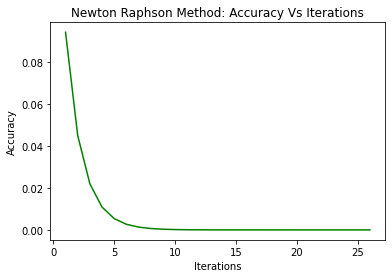

In [7]:
n_i = []
n_a = []
for i in n_acc:
    n_i.append(i[0])
    n_a.append(i[1])
plt.title("Newton Raphson Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(n_i,n_a,color = 'green')
plt.show()

## Newton's Method Table

In [8]:
print(NR_table)

+-----------+--------------------+--------------------+------------------------+
| Iteration |         x0         |         x1         |         f(x1)          |
+-----------+--------------------+--------------------+------------------------+
|     1     |        0.75        | 0.6557186382215311 |  0.018673149380321497  |
|     2     | 0.6557186382215311 | 0.6107405164465891 |  0.004595736104167858  |
|     3     | 0.6107405164465891 | 0.5887722356663022 | 0.0011400042989007098  |
|     4     | 0.5887722356663022 | 0.5779157180522141 | 0.00028389380245946727 |
|     5     | 0.5779157180522141 | 0.5725190396698892 | 7.083560720622106e-05  |
|     6     | 0.5725190396698892 | 0.569828554745554  | 1.769170691978683e-05  |
|     7     | 0.569828554745554  | 0.5684852707354441 | 4.420779597058555e-06  |
|     8     | 0.5684852707354441 | 0.567814117703509  | 1.1049266470108954e-06 |
|     9     | 0.567814117703509  | 0.5674786633508083 | 2.7619813897095113e-07 |
|     10    | 0.567478663350

## Function Plot x vs f(x)

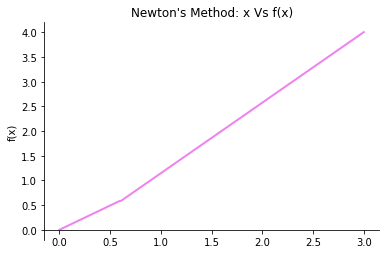

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')  # To move y-axis to center
ax.spines['bottom'].set_position(('data',0))    # To move x-axis to center

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.title("Newton's Method: x Vs f(x)")
plt.ylabel("f(x)")

plt.plot(NR_data[:][2],NR_data[:][3],color='violet',linewidth=2)
# plt.plot(b_b,b_fb,color='violet')
plt.show()